<a href="https://colab.research.google.com/github/esthy13/cil-intrusion-detection/blob/main/notebooks/Esther.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DER
Dark Experience - catastrophic experience forgetting

## 0. Cloning GitHub project repository

In [138]:
!git clone https://github.com/esthy13/cil-intrusion-detection

Cloning into 'cil-intrusion-detection'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 75 (delta 0), reused 3 (delta 0), pack-reused 70 (from 1)
Receiving objects: 100% (75/75), 29.12 MiB | 17.51 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [139]:
%cd cil-intrusion-detection
!git pull

/content/cil-intrusion-detection/cil-intrusion-detection/cil-intrusion-detection/cil-intrusion-detection
Already up to date.


In [140]:
!ls src

data.py  __init__.py  train.py


In [141]:
import sys, os
sys.path.append("/content/cil-intrusion-detection/src")

from src.data import trial

In [142]:
trial()

This is a trail method


## 1. Cleaning the dataset CIC-IDS-2017

In [143]:
# importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [144]:
df_2017 = pd.read_csv("data/raw/CICIDS2017.csv")
print("Dataset shape:", df_2017.shape)
df_2017.head()

Dataset shape: (225745, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [145]:
df_2017[" Label"].unique()

array(['BENIGN', 'DDoS'], dtype=object)

The column label declares whether certain values in the dataset are related to an attack or not

In [146]:
description_2017 = df_2017.describe()
description_2017

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


Identifying columns with all values equal to zero as they will have no influence on the final result

In [147]:
zero_cols = df_2017.columns[(df_2017 == 0).all()]
zero_cols

Index([' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' CWE Flag Count',
       'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate',
       ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [148]:
clean_2017 = df_2017.drop(columns=zero_cols)
clean_2017.shape

(225745, 69)

Dropping rows with NaN values as they represent less than 5% of the total rows:

In [149]:
clean_2017.dropna(inplace=True)
clean_2017.shape

(225741, 69)

In [150]:
# Columns with object type (usually strings) or category type
non_numeric_cols = df_2017.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_cols

[' Label']

There are no other non-numeric columns except for the label column

There are no numeric columns with a number of unique values equal to the number of rows

In [151]:
# Check if there are duplicates
clean_2017.duplicated().sum()
# TODO Should we drop duplicates or not? With time series data it's not suggested

np.int64(2633)

In [152]:
X, y = clean_2017.drop(columns=" Label"), clean_2017[" Label"]
print(X.shape, y.shape)

(225741, 68) (225741,)


In [153]:
# Count inf/-inf per column
inf_counts = np.isinf(X).sum()

# Keep only columns with at least one inf
inf_counts_nonzero = inf_counts[inf_counts > 0]
inf_counts_nonzero

,0
Flow Bytes/s,30
Flow Packets/s,30


In [154]:
# Boolean mask: True if a row has any inf/-inf
mask_inf = np.isinf(X).any(axis=1)

# Select rows with inf values
rows_with_inf = X[mask_inf]
print(f"Rows with inf values represent {len(rows_with_inf) * 100 / X.shape[0]:.3f}% of the dataset")

Rows with inf values represent 0.013% of the dataset


In [155]:
# Corresponding labels in y
labels_with_inf = y[mask_inf & (y == "DDoS")]
print("Number of rows with inf values that correspond to a DDoS attack", len(labels_with_inf), "/", len(rows_with_inf) )

Number of rows with inf values that correspond to a DDoS attack 2 / 30


This means we can get rid of these rows, as they're not meaningful

In [156]:
X = X[~mask_inf]
y = y[~mask_inf]
print(X.shape, y.shape)

(225711, 68) (225711,)


In [157]:
# Looking for highly correlated features and candidate drops / PCA

import pandas as pd
import numpy as np

# Compute correlation matrix
corr = X.corr()

# Drop one column from each perfectly correlated pair.
to_drop = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i, j] == 1:
            to_drop.add(corr.columns[i])
to_drop

{' Avg Fwd Segment Size',
 ' ECE Flag Count',
 ' Fwd Header Length.1',
 ' SYN Flag Count',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 'Subflow Fwd Packets'}

In [158]:
X_reduced = X.drop(columns=list(to_drop))
print(X_reduced.shape)

(225711, 60)


In [159]:
#TODO should we drop more columns here?
unique_counts = X_reduced.nunique()
unique_counts.sort_values(ascending=False)

,0
Flow Bytes/s,202292
Flow Packets/s,194093
Flow IAT Mean,193665
Fwd Packets/s,192230
Flow Duration,187751
Flow IAT Std,159622
Bwd Packets/s,144444
Flow IAT Max,139744
Bwd IAT Mean,117311
Bwd IAT Std,113859


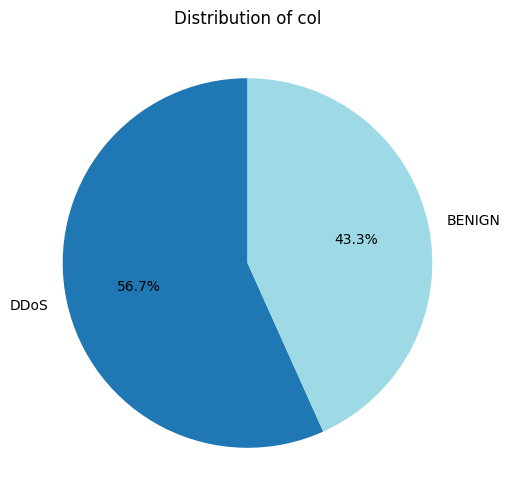

In [160]:
# Label distribution
# visualize with a pieplot
import matplotlib.pyplot as plt

# Count occurrences of each category
counts = y.value_counts()

# Pie chart
plt.figure(figsize=(6,6))
counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.ylabel('')  # remove default y-label
plt.title('Distribution of col')
plt.show()

In [161]:
df_clean = X_reduced.copy()
df_clean['label'] = y
df_clean.to_csv("data/processed/cleaned_2017_esthy.csv", index=False)

OSError: Cannot save file into a non-existent directory: 'data/processed'

## 2. Explore the dataset UNSW-NB15